# NEUROTOOL: SPINDLE, SLOW WAVE  AND SPIKE TRAIN MODULATION ANALYSIS
This notebook demonstrates how to use functions in spindle_analysis_utils.py to automatically analyze the modulation between sleep spindles and spike trains of single channel electrophysiological data. In addition, a pipeline is created for ease of use, this document is created to give information about the functions in spindle_analysis_utils.py file. 

__NOTE: spindle_analysis_utils.py and this notebook file uses some other functions in analysis_utils.py file. Further instructions for functions in analysis_utils.py file can be found in the notebook analysis_utils.ipynb.__ 

Please make sure to install required libraries first. You can find the libraries you need by running the first code cell and reading the error message.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_utils import *
from spindle_analysis_utils import *

## 1. Loading the data and creating a dummy spike train
As an example, we load 15 seconds of N2 sleep on a single channel EEG data. The sampling rate is 200 Hz.
For demonstration purposes, we will create a dummy spike train that is intentionally arranged to "have" spikes in spindle time frames, so that we can see how Neurotool helps us to analyze the modulation.

In [2]:
# Load data
data = np.loadtxt('data_N2_spindles_15sec_200Hz.txt')
l = len(data)

# Define sampling frequency and time vector
fs = 200
times = np.arange(data.size) / fs

In [3]:
spike_train = []
for i in data:
    spike_train.append(0)

index = 100
while index < l:
    spike_train[index] = 1
    index += 100

## 2. Plotting the data and the dummy spike train
Let's plot the data and the spike train for visualization purposes.

<IPython.core.display.Javascript object>


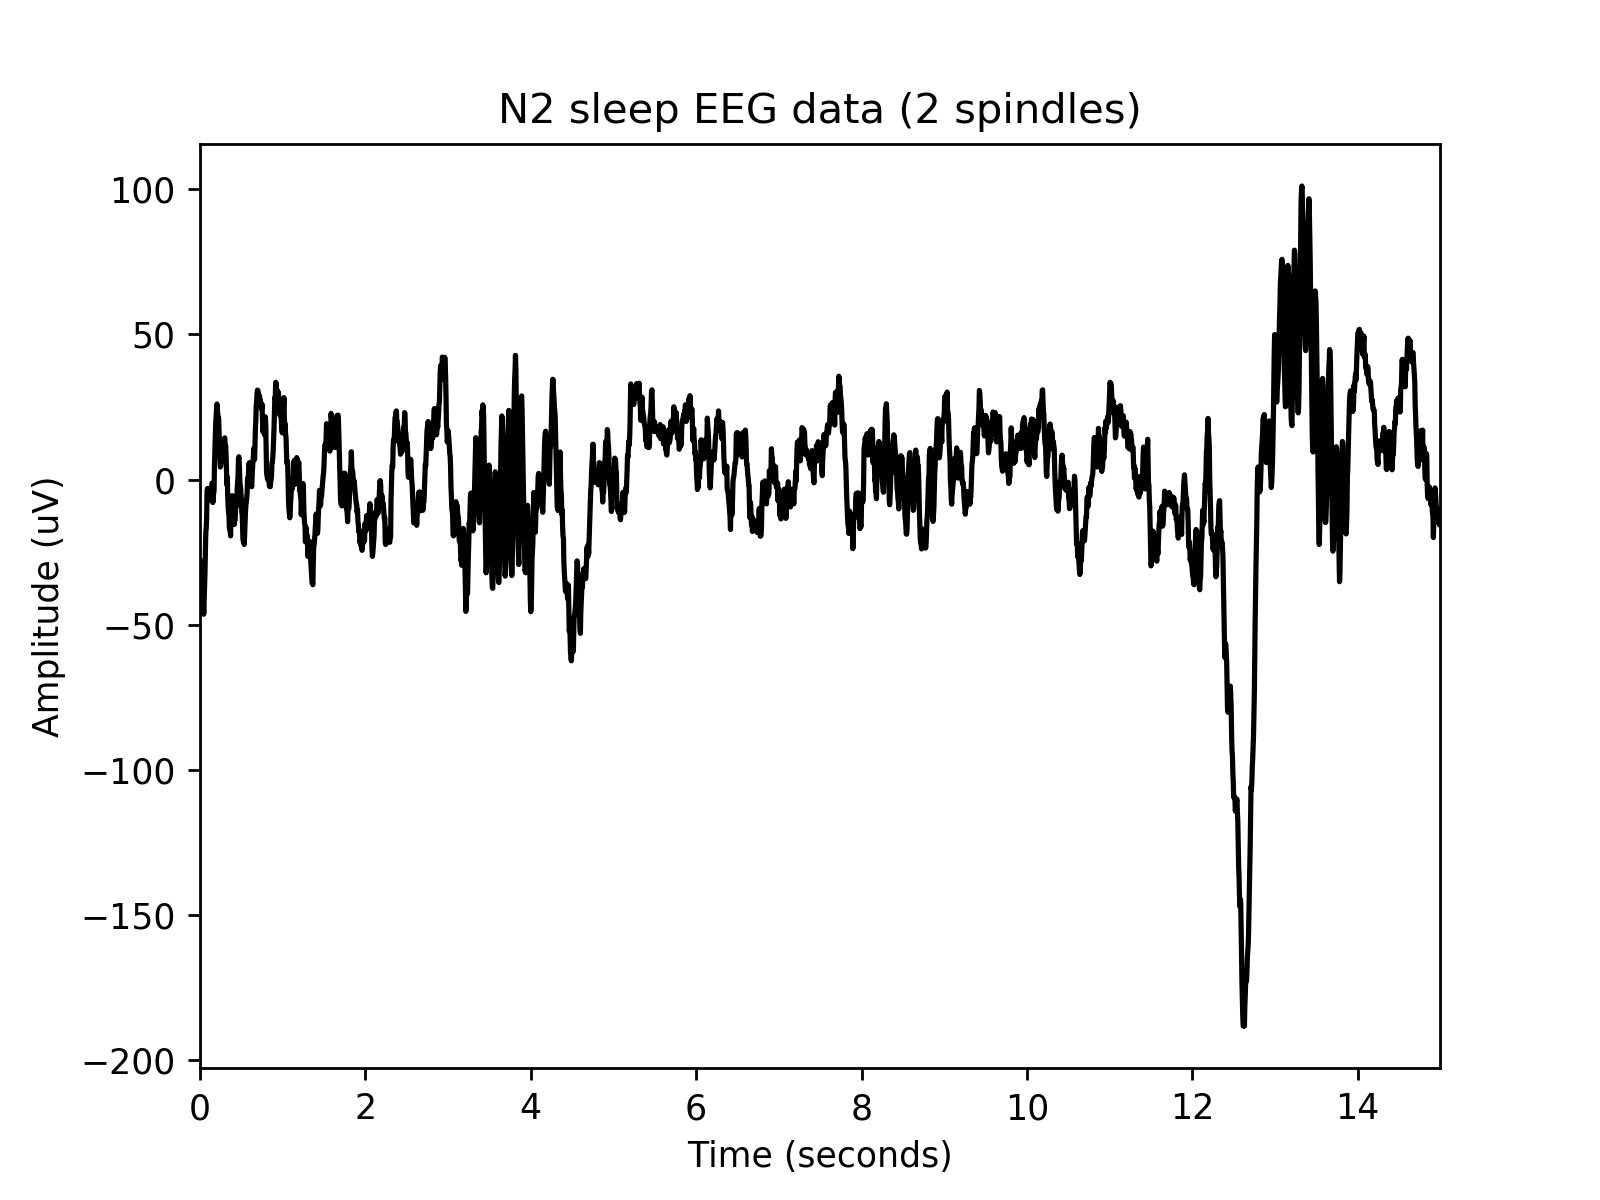

In [4]:
%matplotlib notebook
plot_data(data, times, 'Time (seconds)', 'Amplitude (uV)', 'N2 sleep EEG data (2 spindles)', [times.min(), times.max()])

We can clearly see that there are two clean spindles on this 15-seconds epoch. The first one starting at around 3.5 seconds and the second one starting around 13 seconds. Let's plot the spike train.

<IPython.core.display.Javascript object>


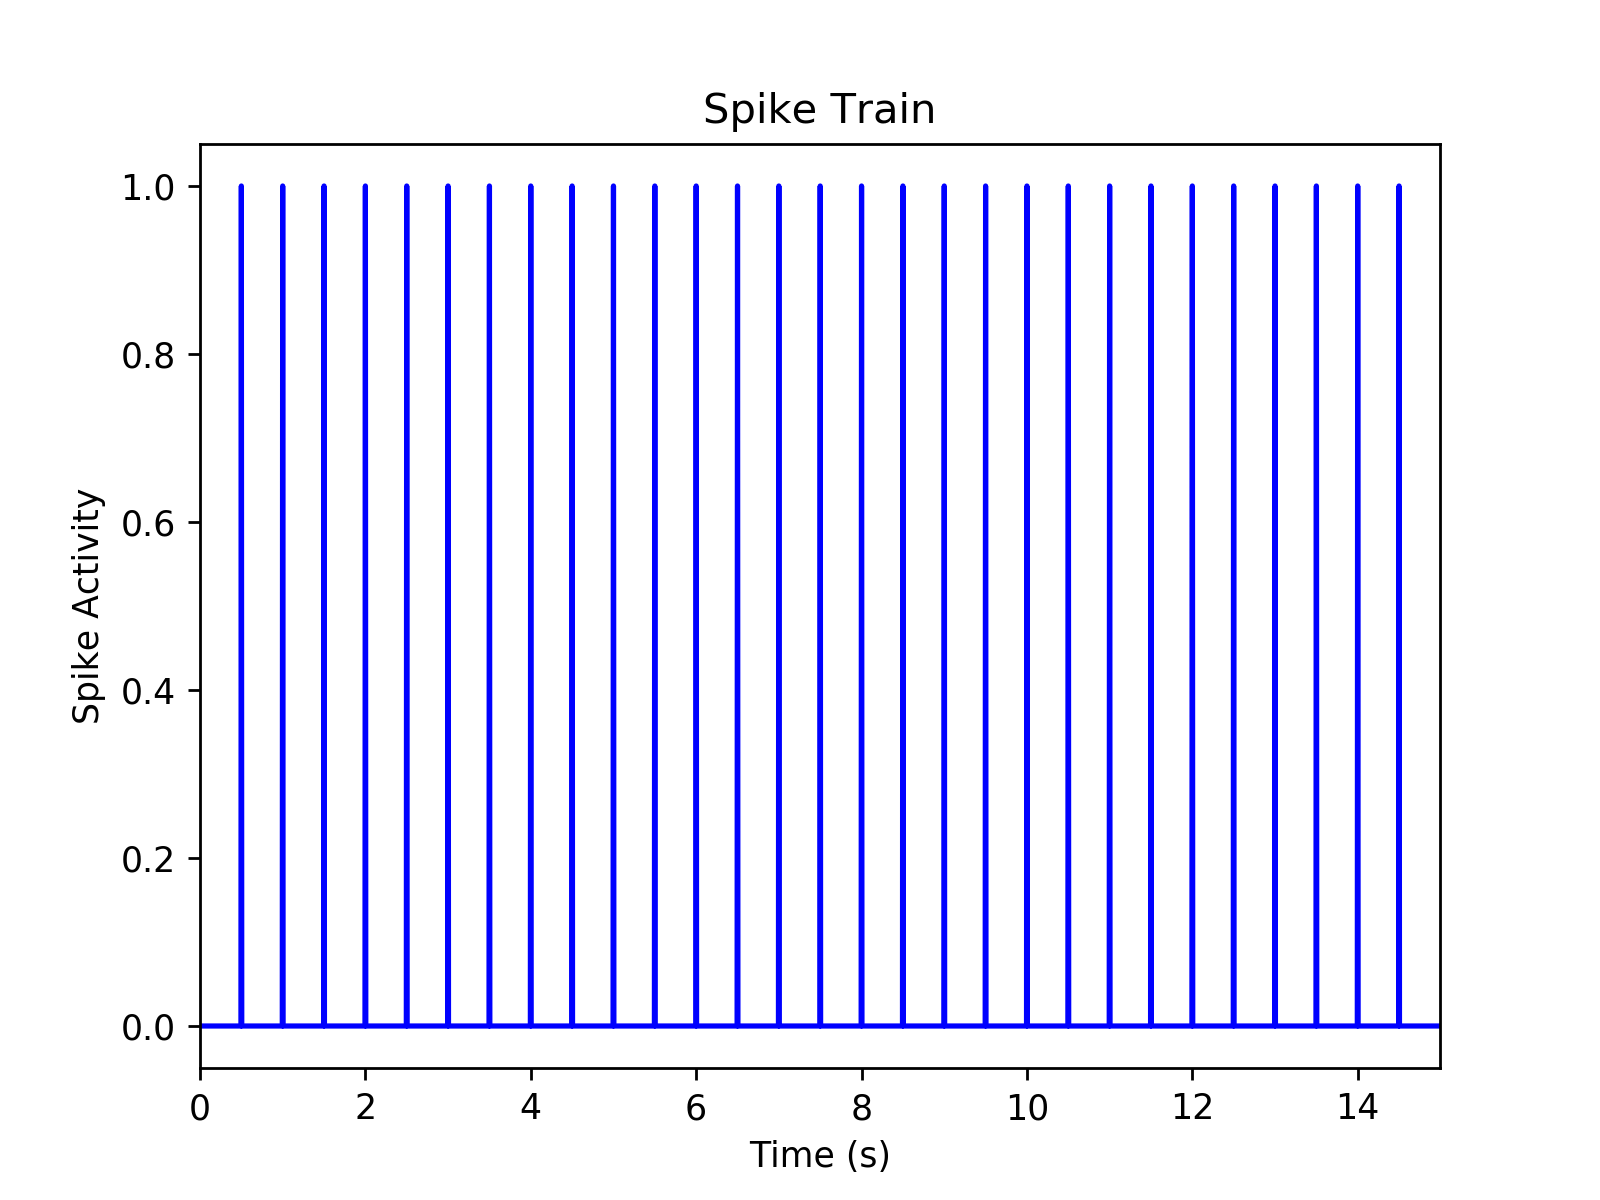

In [5]:
%matplotlib notebook
plot_spike_train(spike_train, times, [times.min(), times.max()])

Here we can see the spikes that are created manually inside the spindles. 

## 3. Functions of Neurotool
In this section all of the functions in spindle_analysis_utils.py will be introduced. 

__NOTE: Further details of each function (inputs and outputs) can be found in comment lines of the spindle_analysis_utils.py file.__

### 3.1. find_spindles function
Let's find spindles inside the data with this function. This function makes use of the library YASA, and returns a pandas Dataframe showing detected spindles. Further details of the algorithm can be found in [this](https://www.sciencedirect.com/science/article/pii/S0165027018302504?via%3Dihub) article.

In [3]:
sp = find_spindles(data, fs)
sp

,Start,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry
0,3.32,4.06,0.74,81.800396,19.650618,2.722480,0.495178,12.859197,10.0,0.653333
1,13.26,13.85,0.59,99.302635,24.495293,2.827413,0.240493,12.158956,7.0,0.250000


### 3.2. plot_spindles function
This function helps us plot spindles on top of the data for visualization purposes.

<IPython.core.display.Javascript object>


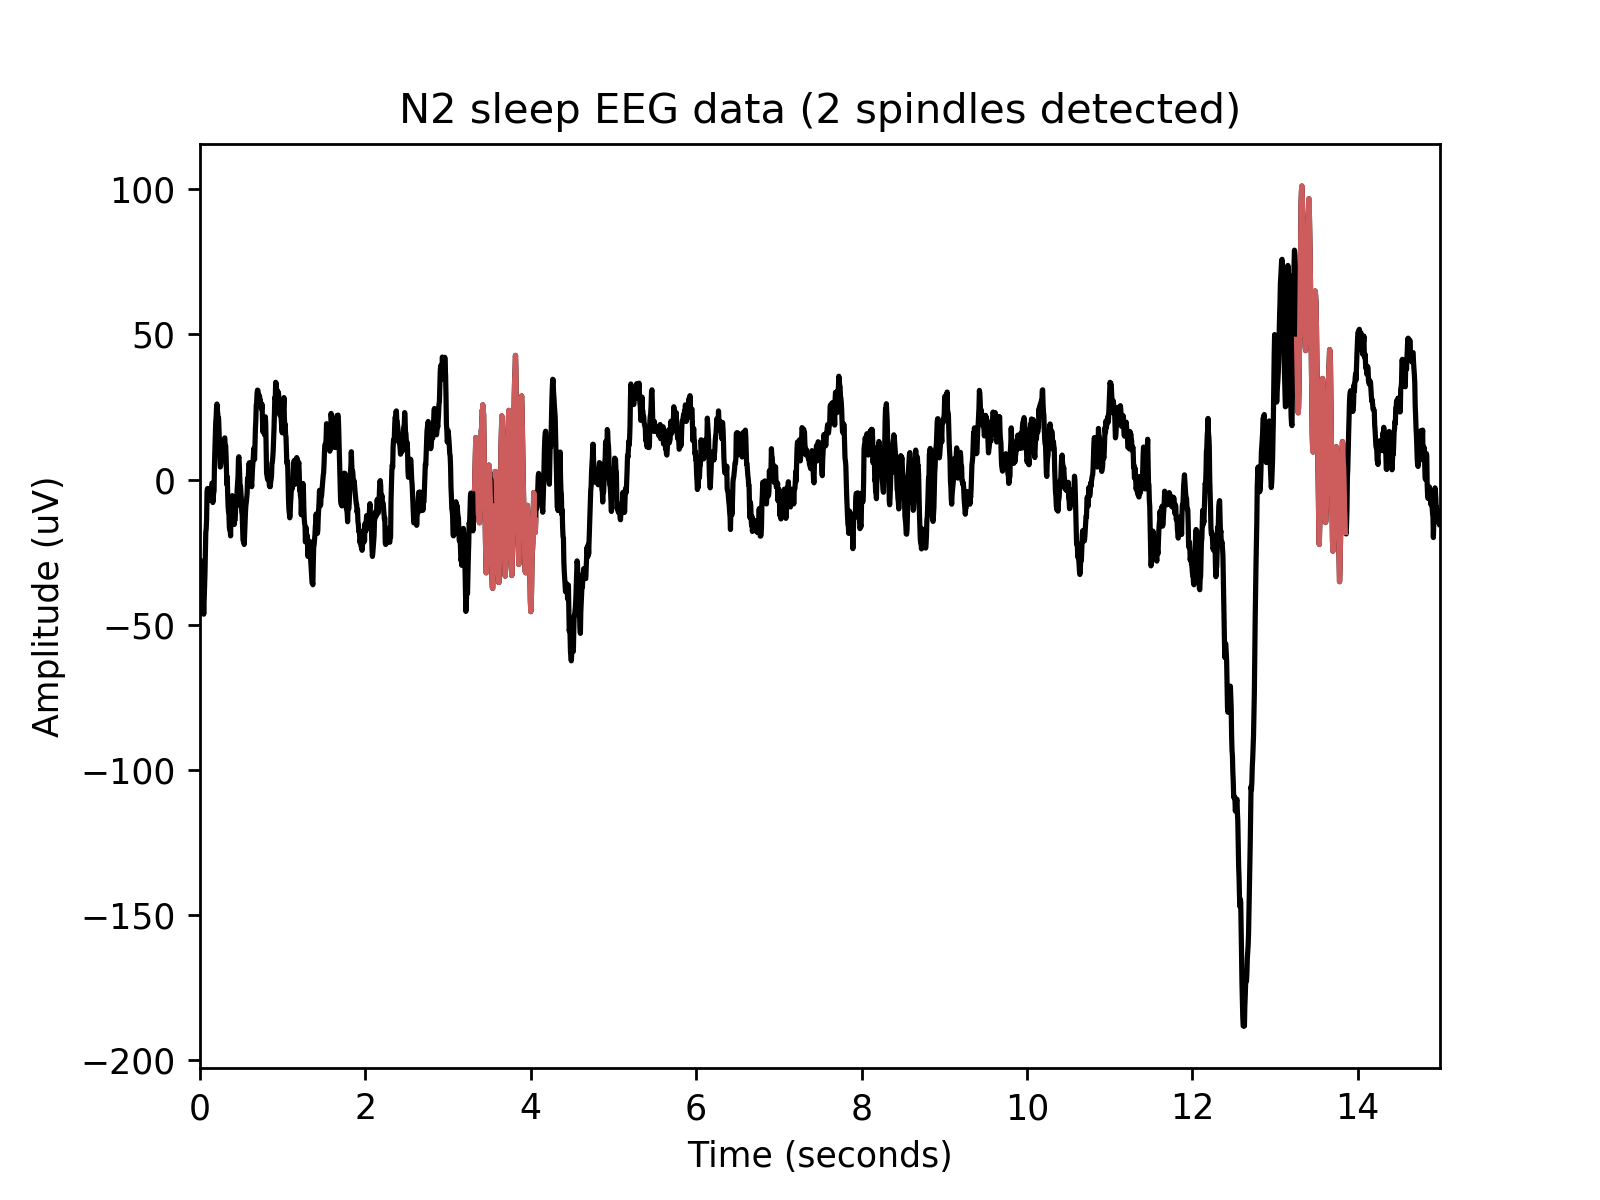

In [5]:
%matplotlib notebook
plot_spindles(data, times, fs, sp, 'Time (seconds)', 'Amplitude (uV)', 'N2 sleep EEG data (2 spindles detected)', [times.min(), times.max()])

In [7]:
envelope = get_envelope_wave(data[])

### 3.3. spindle_phase_hist function
This function helps us derive the phase histograms of spike train, during specific phase intervals in spindle time. This function returns an array of 4 elements. First and second item of this array can be fed into plot_barchart and plot_polarbarchart functions in order to visualize the histogram. Third and fourth terms are dictionaries that saves phase and time aligned spike trains during spindle periods. In the histogram, all spindle spike trains will be added on top of each other so that we can check the modulation between spindles and spikes. In this example phase intervals are taken to be 30 degrees.

In [8]:
phase = np.pi/6
hist = spindle_phase_hist(sp, phase, fs, spike_train)
phase_hist_spike_trains = hist[2]
time_spike_trains = hist[3]
arr = hist[0:2]

In [9]:
phase_hist_spike_trains

{'0': [[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '1': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]]}

In [10]:
time_spike_trains

{'0': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 '1': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,

### 3.4. spindle_envelope_phase_hist function
This function helps us derive the phase histograms of spike train, during specific phase intervals of spindle envelope. This function returns an array of 3 elements. First and second item of this array can be fed into plot_barchart and plot_polarbarchart functions in order to visualize the histogram. In the histogram, all spindle spike trains will be added on top of each other so that we can check the modulation between spindles and spikes. In this example phase intervals are taken to be 30 degrees. Third element is a dictionary to save phase aligned spike trains within spindle envelope duration.

In [11]:
phase = np.pi/6
hist = spindle_envelope_phase_hist(sp, phase, fs, spike_train)
phase_hist_envelope_spike_trains = hist[2]
arr_envelope = hist[0:2]

del hist

In [12]:
phase_hist_envelope_spike_trains

{'0': [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]],
 '1': [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]]}

## 4. Plotting the spindle's and spindle envelope's phase histogram
We can use the following functions to plot histograms.

<IPython.core.display.Javascript object>


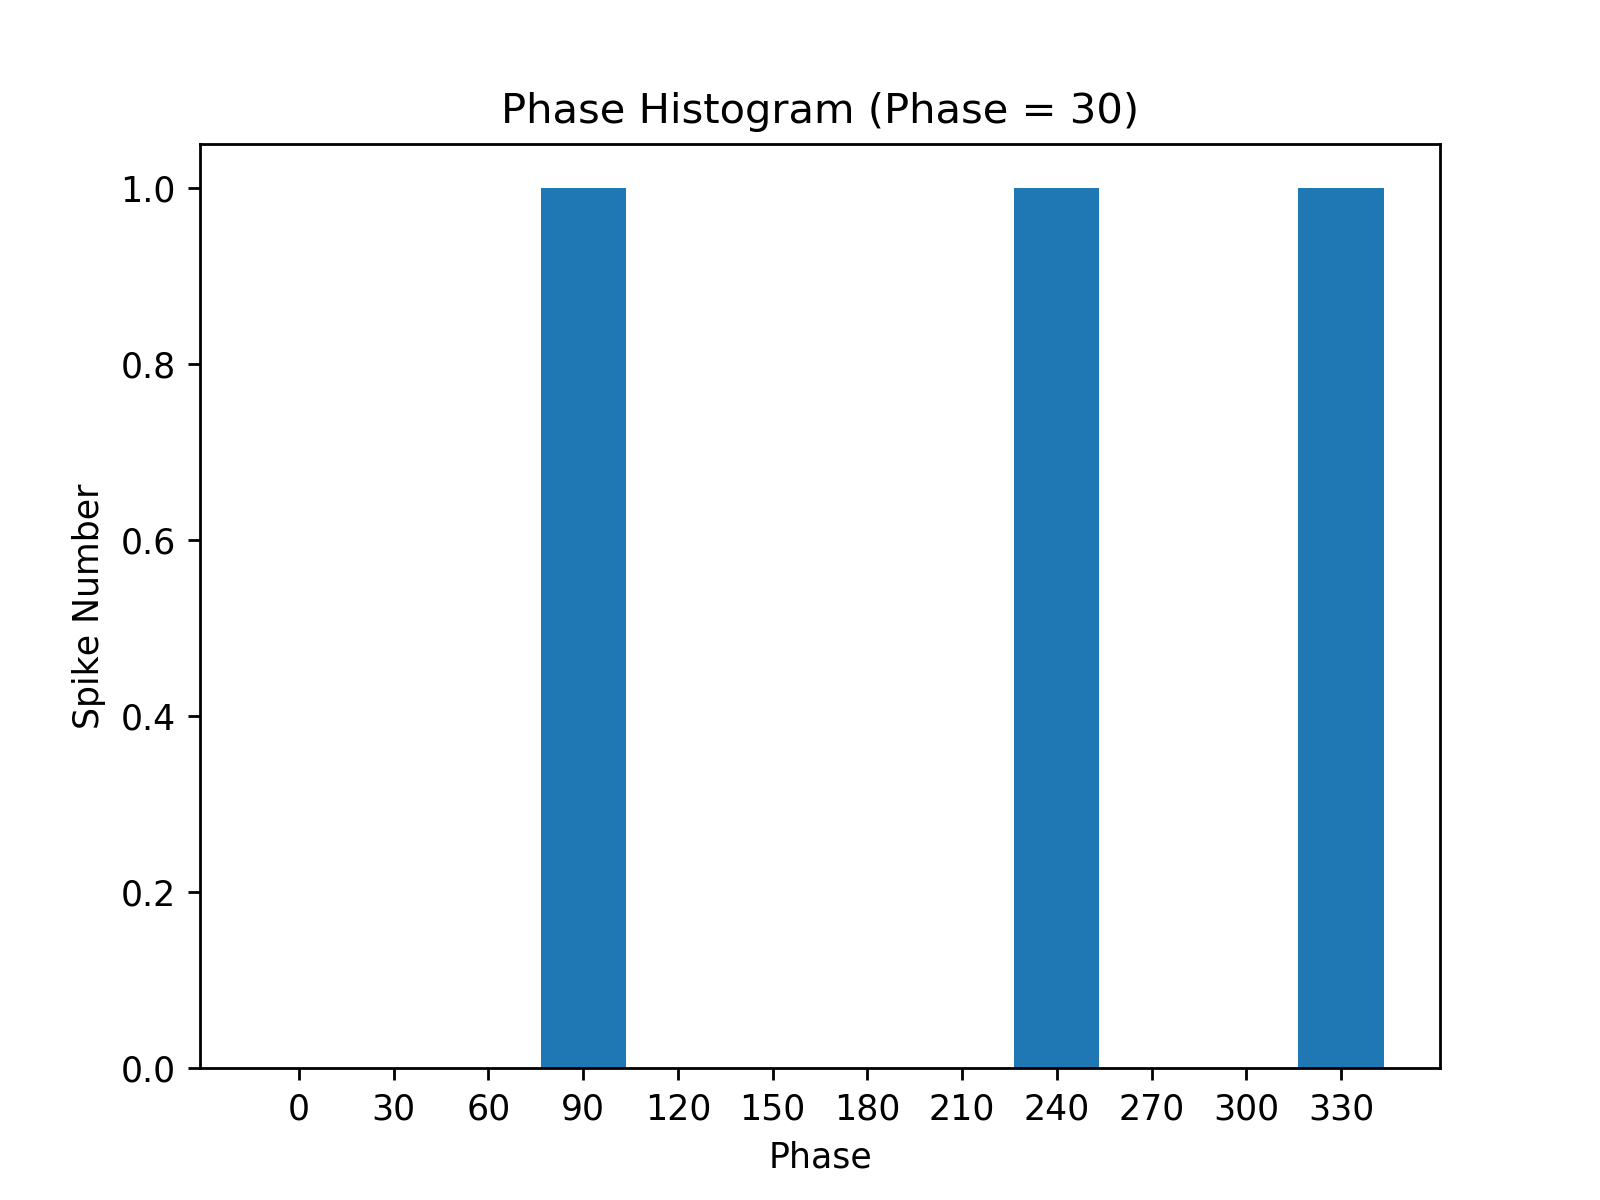

In [13]:
%matplotlib notebook
plot_barchart(arr, phase)

<IPython.core.display.Javascript object>


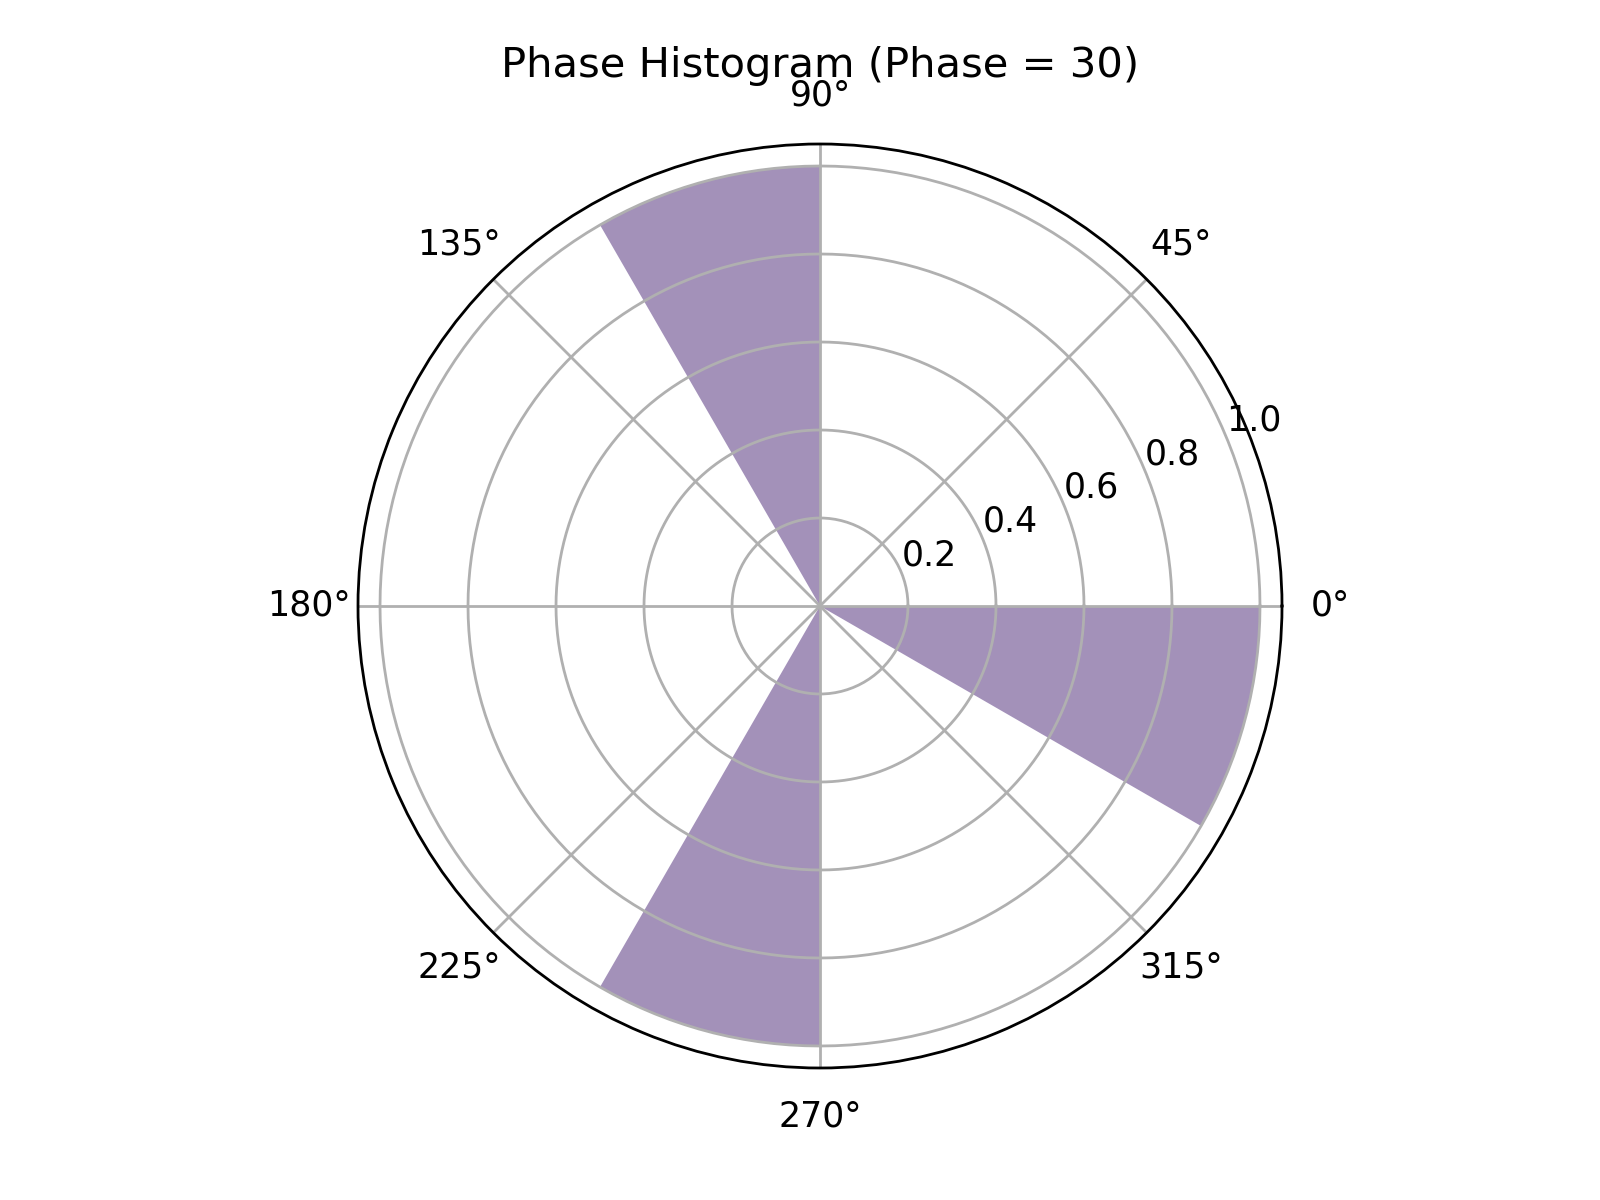

In [14]:
%matplotlib notebook
plot_polarbarchart(arr, phase)

<IPython.core.display.Javascript object>


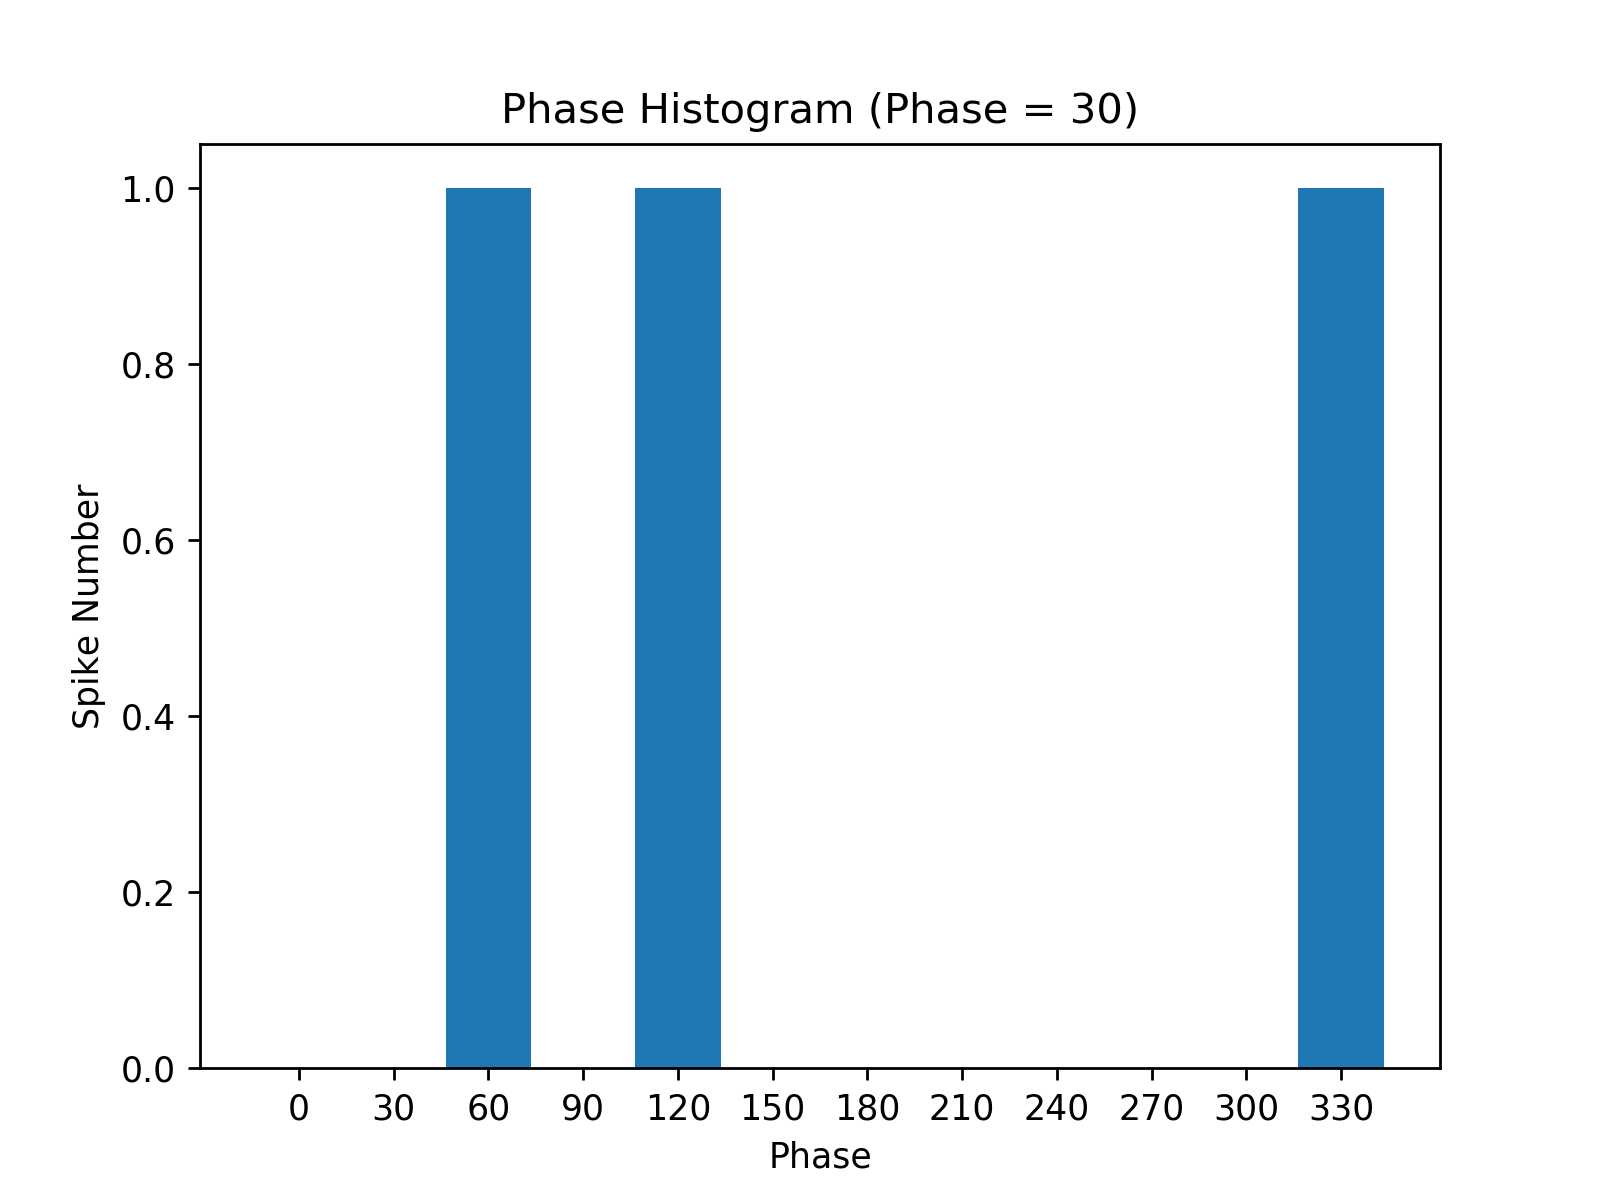

In [15]:
%matplotlib notebook
plot_barchart(arr_envelope, phase)

<IPython.core.display.Javascript object>


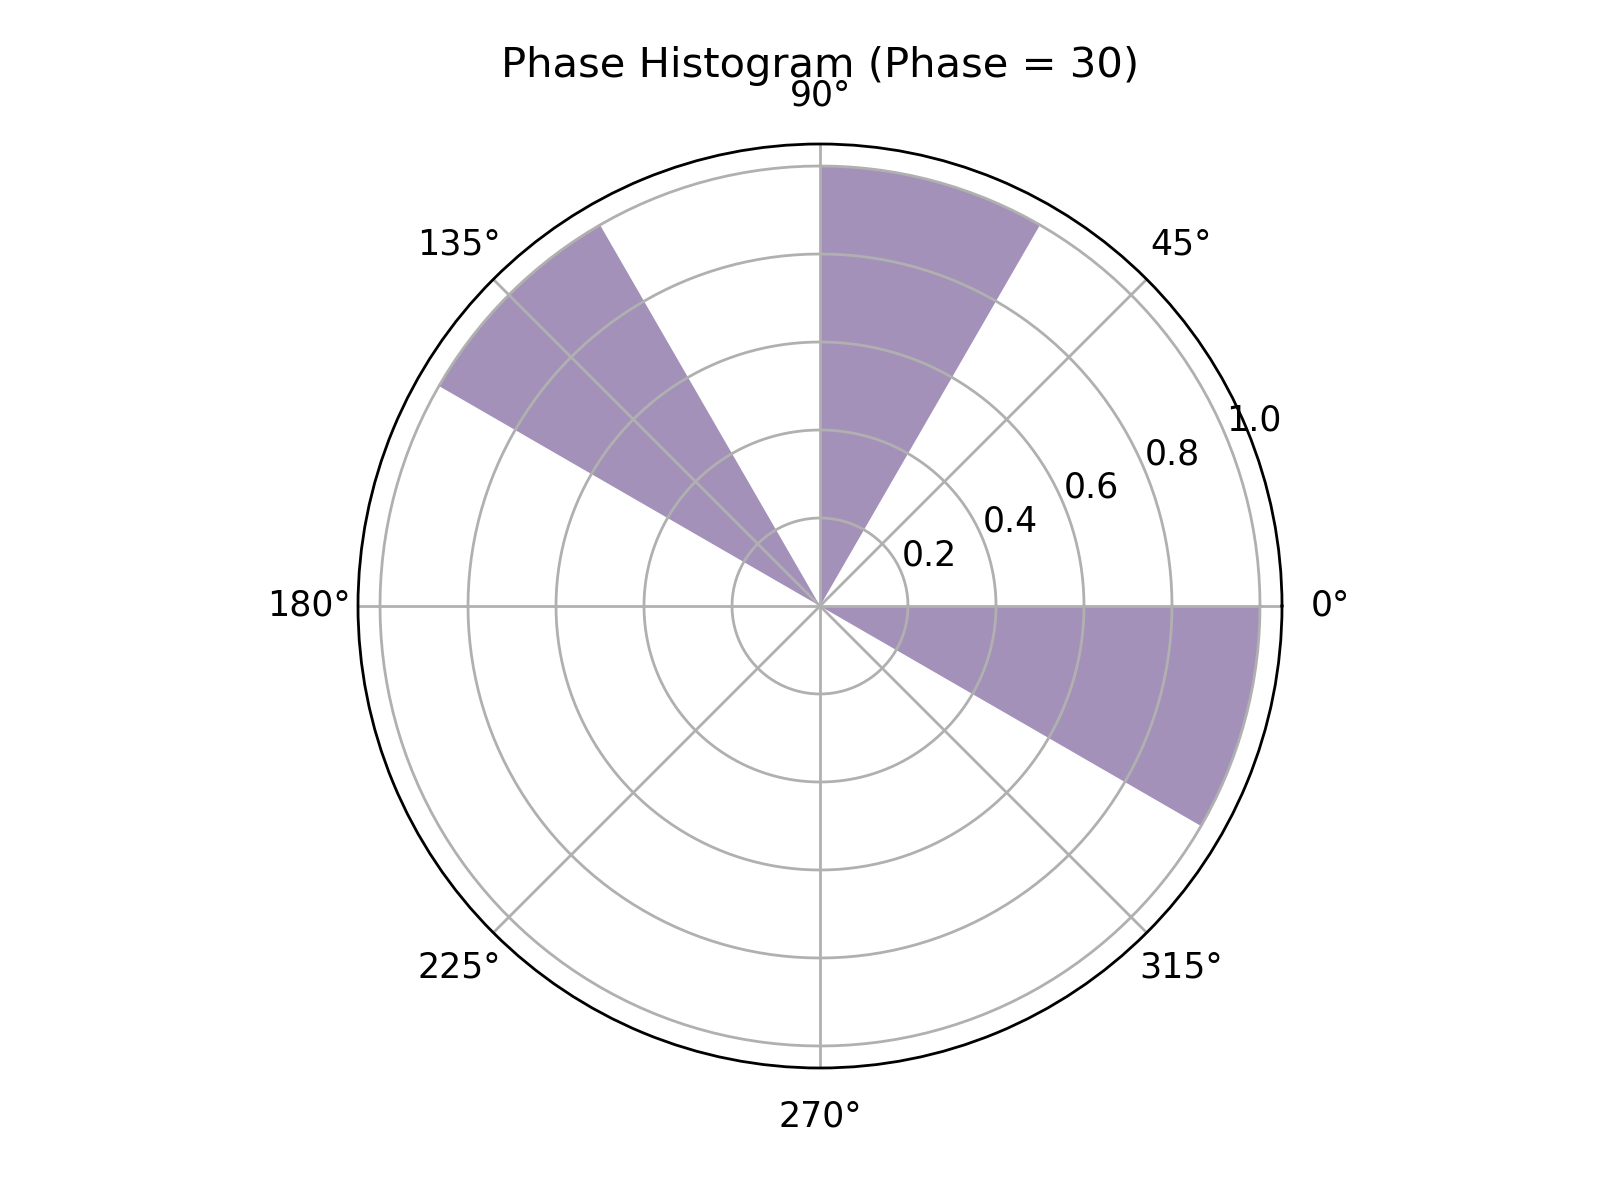

In [16]:
%matplotlib notebook
plot_polarbarchart(arr_envelope, phase)

Each spindle's phase histogram could also be plotted both in spindle phase and spindle's envelope phase by accesing those spike aligned spike train arrays in the following variables:
- phase_hist_envelope_spike_trains
- phase_hist_spike_trains

You can also access time aligned spike trains during each spindle's time in the following variable:
- time_hist_spike_trains

## 5. Conclusion
After all, looking at these histogram plots we can understand if there's a modulation between spiking pattern and sleep spindles. For instance, if we apply this to a huge data with a lot of spindles we might observe that there are a lot of spikes, relatively, in some specific phase angle. Thus, this analysis will help us to understand how spindles correlate with the firing pattern of neurons. 

__GOOD NEWS: You don't need to learn how these functions work in order to make this analysis. I created a pipeline so that you can directly insert your data path and spike train, and all the analysis will be done by the notebook!__

This notebook is created by Mert Unsal in ETH Zurich Neuroinformatics Lab under supervision of PhD. Tansel Baran Yasar. You can reach me out at mailmertunsal@gmail.com for further questions or discussion.